In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from google_trans_new import google_translator 
%matplotlib inline
# Cleanliness of displays
np.set_printoptions(suppress=True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%precision 3


'%.3f'

The original code to get the translations of enjoined is below. Note that there may be some variation in translations over time, but our results are timestamped

In [7]:
# from multiprocessing.dummy import Pool as ThreadPool # import threading for translating multiple sentences
# from functools import partial


# translator = google_translator()
# df_goog_lang=pd.read_csv('google_languages.csv')
# list_lang=df_goog_lang.iloc[:,1].values


# def backtranslate_once(text, lang):
#   en_lang = translator.translate(text, lang_src='en',lang_tgt=lang)
#   lang_en = translator.translate(en_lang, lang_src=lang, lang_tgt='en')
#   return (lang, en_lang, lang_en)

# def threaded_longitudinal(langs, text):
#   pool = ThreadPool(8)
#   backtranslate_partial = partial(backtranslate_once, text)
#   try:
#     results = pool.map(backtranslate_partial, langs)
#   except Exception as e:
#     raise e
#   pool.close()
#   pool.join()

#   return results


# text = "The court enjoined the violence!"
# results = threaded_longitudinal(list_lang.tolist(), text)

# def process_results(tup_list, lang_list):
#   #this sorts the results by language in case they get out of order from threading
#   #then it splits the tuples and converts to a dataframe

#   sorted_results = sorted(tup_list, key=lambda tup : lang_list.index(tup[0]))
#   langs, en_lang_translated, lang_en_translated = zip(*sorted_results)
#   lang_names = []
#   for lang in langs:
#     lang_names.append(df_goog_lang.loc[df_goog_lang.iloc[:,1]==lang].Language.values[0])
#   df_lang = pd.DataFrame(data=np.stack([np.array(lang_names), np.array(en_lang_translated),np.array(lang_en_translated)], axis = -1), columns=["Language", "En2Language", "Language2En"])
#   return df_lang


# df_trans =process_results(results, list_lang.tolist())

# df_trans.head(10)

In [22]:
enj_trans = pd.read_csv("enjoined_translated_1-31-2021.csv", index_col = 0)

In [27]:
enj_trans.head(10)

,Language,En2Language,Language2En
0,Afrikaans,Die hof beveel die geweld!,The court orders the violence!
1,Albanian,Gjykata urdhëroi dhunën!,The court ordered the violence!
2,Amharic,ፍርድ ቤቱ አመፁን አዘዘ!,The court ordered the protest!
3,Arabic,أمرت المحكمة بالعنف!,Court ordered violence!
4,Armenian,Դատարանը պատվիրեց բռնությունը:,The court ordered the violence.
5,Azerbaijani,Məhkəmə şiddəti əmr etdi!,The court ordered violence!
6,Basque,Auzitegiak indarkeria agindu zuen!,The court ordered violence!
7,Belarusian,Суд прызначыў гвалт!,The court ordered violence!
8,Bengali,আদালত সহিংসতার নির্দেশ দিয়েছে!,Court orders violence!
9,Bosnian,Sud je naredio nasilje!,The court ordered violence!


In [10]:
nuance_indices = [13, 14, 20, 35, 41, 43, 54, 70, 97, 99] # cases where it translates to prohibition
misc_indices = [34, 47, 36, 38, 44, 52, 53, 78, 96, 104, 106] # translations that are strange or wrong but in neither direction

In [28]:
non_nuance = df_trans.shape[0] - len(nuance_indices) -len(misc_indices)

[88, 10, 11]


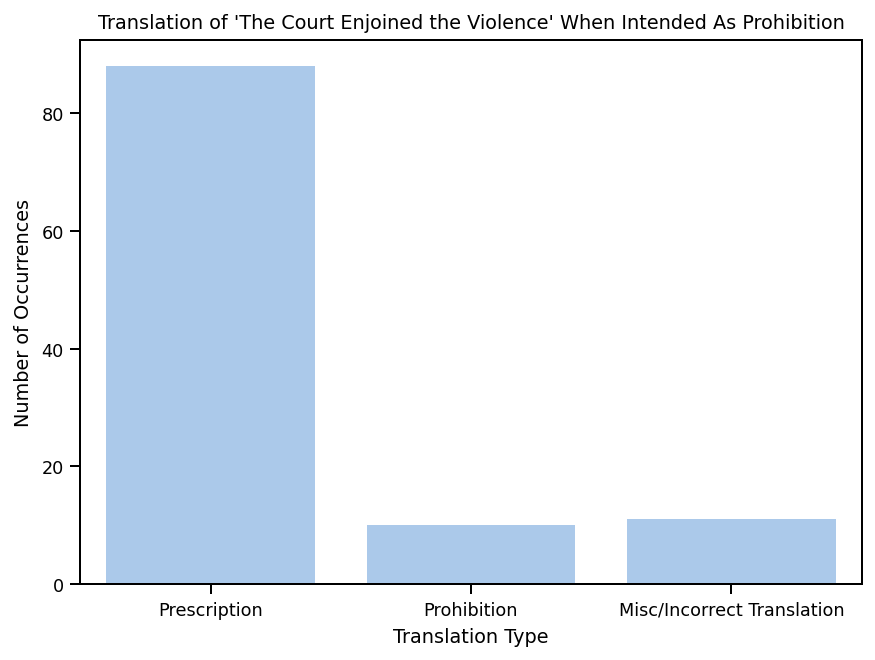

In [29]:
import seaborn as sns
sns.set_context('paper')
sns.set_color_codes('pastel')
d = pd.DataFrame({"Translation Type": ["Prescription", "Prohibition", "Misc/Incorrect Translation"],
                  "Number of Occurrences": [non_nuance, len(nuance_indices), len(misc_indices)]})
f, ax = plt.subplots(figsize = (7,5))
print([non_nuance, len(nuance_indices), len(misc_indices)])
p = sns.barplot(x="Translation Type", y = "Number of Occurrences", data = d, color = 'b' )
# plt.bar(["Prescription", "Prohibition", "Misc/Incorrect Translation"], [non_nuance, len(nuance_indices), len(misc_indices)])
plt.title("Translation of 'The Court Enjoined the Violence' When Intended As Prohibition")
# plt.xlabel("Translation Type")
# plt.ylabel("Number of Occurrences")
plt.show()

Now we move on from the Longitudinal experiment to the Latintudinal experiment.

In [30]:
# def backtranslate_one_text(lang, text):
#   en_lang = translator.translate(text, lang_src='en',lang_tgt=lang)
#   lang_en = translator.translate(en_lang, lang_src=lang, lang_tgt='en')
#   return (lang, en_lang, lang_en)

# def threaded_latitudinal(lang, texts):
#   pool = ThreadPool(8)
#   backtranslate_partial = partial(backtranslate_one_text, lang)
#   try:
#     results = pool.map(backtranslate_partial, texts)
#   except Exception as e:
#     raise e
#   pool.close()
#   pool.join()

#   return results

# sentences = ["The war cry for justice was all over - Much to the chagrin of the authorities.", 
#              "The regime's decision adumbrates the underlying agenda.",
#              "The community was anxious over the passing of the much needed reforms.",
#              "The think tank  published a paper outlining their apology of capital punishment.",
#              "Aught was left of the petition's validity",
#              "The President exhorted his ministers to buckle up as key opposition support for his economic plan was about to buckle.",
#              "The voters were chuffed to see the bill passed.",
#              "The lawyer's discursive narration swayed the jury.",
#              "he court enjoined the violence!",
#              "The EU block opposed an eventual imposition of anti-dumping measures.",
#              "A fulsome eulogy was delivered by the sly counsel.",
#              "The gig-economy agency decided to garnish the refunds!",
#              "Members of the anti-theocratic revolutionary movement overthrew the peers in power!",
#              "The traitors disappointingly decided to fight with the colonialists."]

#for igbo, can be replaced with'kn' to get Kannada translations
# results = threaded_longitudinal("ig", sentences)

In [34]:
igbo_translations = pd.read_csv("en_igbo_contronyms_2-6-2021.csv")

In [35]:
igbo_translations.head(10)

,Unnamed: 0,lang,en_lang,lang_en
0,0,ig,Ọgụ a na-eti maka ikpe ziri ezi agwụla - ọtụtụ...,The battle for justice is over - many are upse...
1,1,ig,Mkpebi nke ọchịchị na-ekwupụta ebumnuche kpata...,The government’s decision articulates the unde...
2,2,ig,Ndị obodo ahụ nwere nchegbu maka ịgafe mgbanwe...,The community is concerned about going through...
3,3,ig,Lọ ọrụ ahụ chepụtara akwụkwọ na-akọwa mgbaghar...,The employer devised a document explaining the...
4,4,ig,Enweghị ihe ọ bụla nke nkwado nke arịrịọ ahụ,There was no support for the request
5,5,ig,Onye isi oche ahụ gbara ndị ozi ya ume ka ha g...,The president urged his ministers to remain si...
6,6,ig,Ndị juru vootu ahụ hụrụ ka ụgwọ a gafere.,The voters saw the bill passed.
7,7,ig,Nkwupụta okwu a nke ọkàiwu gbanwere ndị juri a...,The prosecutor's statement changed the jury.
8,8,ig,ụlọ ikpe nyere iwu ka e mee ihe ike!,court orders violence!
9,9,ig,Ihe mgbochi EU megidere nnabata mgbochi mgbochi.,EU sanctions violate EU sanctions.
